<a href="https://colab.research.google.com/github/jonatansg/CEIABD/blob/main/Actividad_3_6_DengAI_prediccion_de_la_propagacion_de_enfermedades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** Jonatan Santana González

In [1]:
# 📌 Paso 1: Cargar los datos desde GitHub

# Importamos las librerías necesarias
import pandas as pd

# URLs de los archivos en GitHub (formato raw)
base_url = "https://raw.githubusercontent.com/jonatansg/CEIABD/main/DengAI/"
train_features_url = base_url + "dengue_features_train.csv"
train_labels_url = base_url + "dengue_labels_train.csv"
test_features_url = base_url + "dengue_features_test.csv"

# Cargar los datos en dataframes
train_features = pd.read_csv(train_features_url)
train_labels = pd.read_csv(train_labels_url)
test_features = pd.read_csv(test_features_url)

# Mostrar información básica sobre los datos cargados
print("Dimensiones de los datos:")
print(f"  - train_features: {train_features.shape}")
print(f"  - train_labels: {train_labels.shape}")
print(f"  - test_features: {test_features.shape}")

# Mostrar las primeras filas de cada dataset
print("\n🔍 Primeras filas de train_features:")
display(train_features.head())

print("\n🔍 Primeras filas de train_labels:")
display(train_labels.head())

print("\n🔍 Primeras filas de test_features:")
display(test_features.head())

Dimensiones de los datos:
  - train_features: (1456, 24)
  - train_labels: (1456, 4)
  - test_features: (416, 24)

🔍 Primeras filas de train_features:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8



🔍 Primeras filas de train_labels:


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6



🔍 Primeras filas de test_features:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [2]:
# 📌 Paso 2: Exploración y Análisis Inicial de los Datos

# Revisar información general de los datasets
print("🔍 Información de train_features:")
train_features.info()
print("\n🔍 Información de train_labels:")
train_labels.info()
print("\n🔍 Información de test_features:")
test_features.info()

# Verificar valores nulos en los datasets
print("\n🔍 Valores nulos en train_features:")
display(train_features.isnull().sum())

print("\n🔍 Valores nulos en train_labels:")
display(train_labels.isnull().sum())

print("\n🔍 Valores nulos en test_features:")
display(test_features.isnull().sum())

# Estadísticas descriptivas de las características
print("\n📊 Estadísticas de train_features:")
display(train_features.describe())

print("\n📊 Estadísticas de train_labels:")
display(train_labels.describe())

print("\n📊 Estadísticas de test_features:")
display(test_features.describe())

🔍 Información de train_features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  

,0
city,0
year,0
weekofyear,0
week_start_date,0
ndvi_ne,194
ndvi_nw,52
ndvi_se,22
ndvi_sw,22
precipitation_amt_mm,13
reanalysis_air_temp_k,10



🔍 Valores nulos en train_labels:


,0
city,0
year,0
weekofyear,0
total_cases,0



🔍 Valores nulos en test_features:


,0
city,0
year,0
weekofyear,0
week_start_date,0
ndvi_ne,43
ndvi_nw,11
ndvi_se,1
ndvi_sw,1
precipitation_amt_mm,2
reanalysis_air_temp_k,2



📊 Estadísticas de train_features:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000



📊 Estadísticas de train_labels:


,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000



📊 Estadísticas de test_features:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


In [3]:
# 📌 Paso 3: Preprocesamiento de Datos y Manejo de Valores Nulos

# Copiamos los datasets para no modificar los originales
train_features_clean = train_features.copy()
test_features_clean = test_features.copy()

# 🔹 1. Convertir 'week_start_date' a formato datetime
train_features_clean['week_start_date'] = pd.to_datetime(train_features_clean['week_start_date'])
test_features_clean['week_start_date'] = pd.to_datetime(test_features_clean['week_start_date'])

# 🔹 2. Crear nuevas características a partir de la fecha
train_features_clean['month'] = train_features_clean['week_start_date'].dt.month
test_features_clean['month'] = test_features_clean['week_start_date'].dt.month

train_features_clean['year_week'] = train_features_clean['year'] * 100 + train_features_clean['weekofyear']
test_features_clean['year_week'] = test_features_clean['year'] * 100 + test_features_clean['weekofyear']

# 🔹 3. Codificar la variable 'city' (San Juan -> 0, Iquitos -> 1)
city_mapping = {'sj': 0, 'iq': 1}
train_features_clean['city'] = train_features_clean['city'].map(city_mapping)
test_features_clean['city'] = test_features_clean['city'].map(city_mapping)

# 🔹 4. Manejo de valores nulos

# Listado de columnas con nulos
columns_with_nans = train_features_clean.columns[train_features_clean.isnull().sum() > 0]

# Para datos climáticos y NDVI, usamos interpolación (mejor opción para series temporales)
for col in columns_with_nans:
    train_features_clean[col] = train_features_clean[col].interpolate(method='linear')
    test_features_clean[col] = test_features_clean[col].interpolate(method='linear')

# Si quedan valores nulos, rellenamos con la mediana
train_features_clean.fillna(train_features_clean.median(), inplace=True)
test_features_clean.fillna(test_features_clean.median(), inplace=True)

# 🔍 Verificación final de valores nulos
print("🔍 Valores nulos después de la imputación en train_features_clean:")
print(train_features_clean.isnull().sum().sum())  # Debe ser 0

print("🔍 Valores nulos después de la imputación en test_features_clean:")
print(test_features_clean.isnull().sum().sum())  # Debe ser 0

# 🔍 Vista previa después del preprocesamiento
print("\n🔹 Primeras filas de train_features_clean:")
display(train_features_clean.head())

print("\n🔹 Primeras filas de test_features_clean:")
display(test_features_clean.head())

🔍 Valores nulos después de la imputación en train_features_clean:
0
🔍 Valores nulos después de la imputación en test_features_clean:
0

🔹 Primeras filas de train_features_clean:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,year_week
0,0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,199018
1,0,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,199019
2,0,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,5,199020
3,0,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,5,199021
4,0,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,5,199022



🔹 Primeras filas de test_features_clean:


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,year_week
0,0,2008,18,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4,200818
1,0,2008,19,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,...,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5,200819
2,0,2008,20,2008-05-13,-0.00150,-0.016133,0.151083,0.091529,3.66,299.455714,...,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,5,200820
3,0,2008,21,2008-05-20,0.02765,-0.019867,0.124329,0.125686,0.00,299.690000,...,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5,200821
4,0,2008,22,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,...,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,5,200822


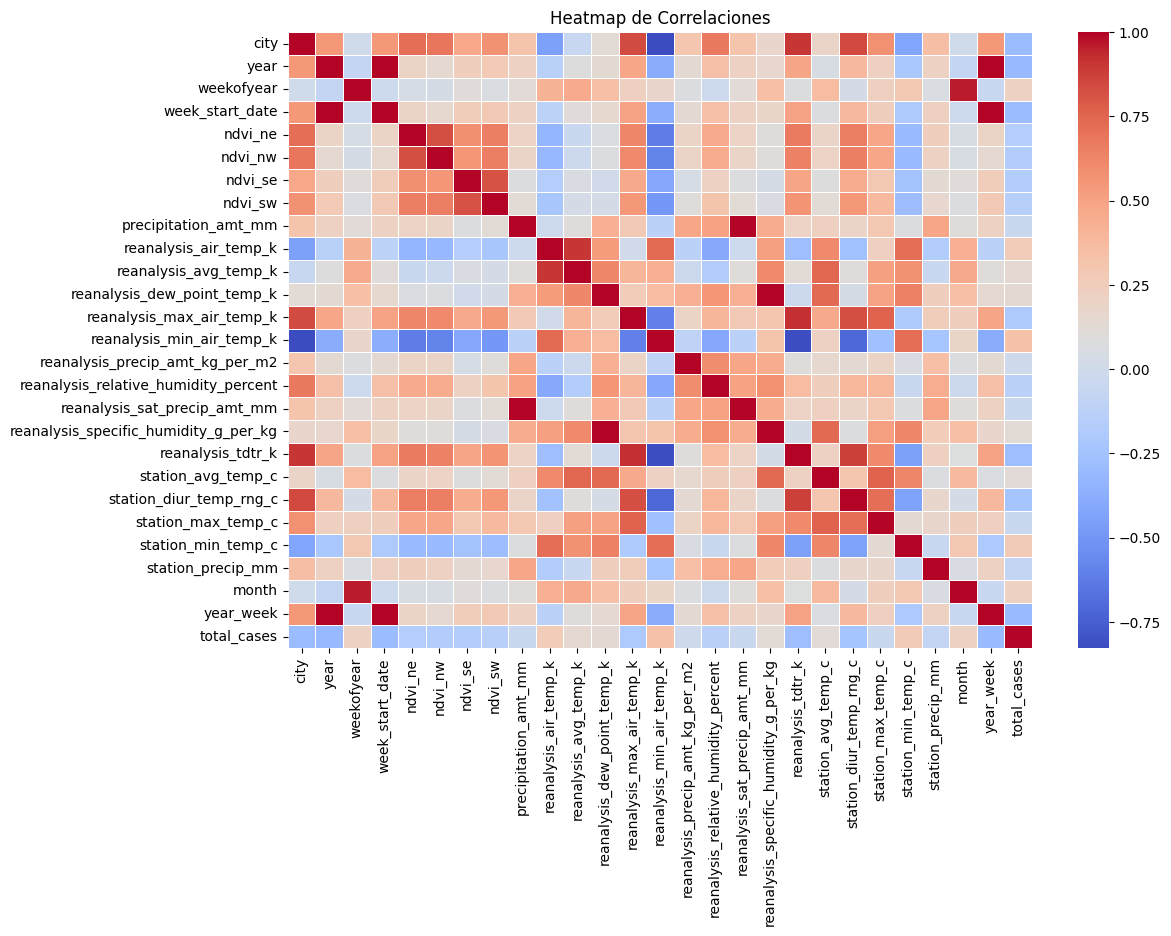

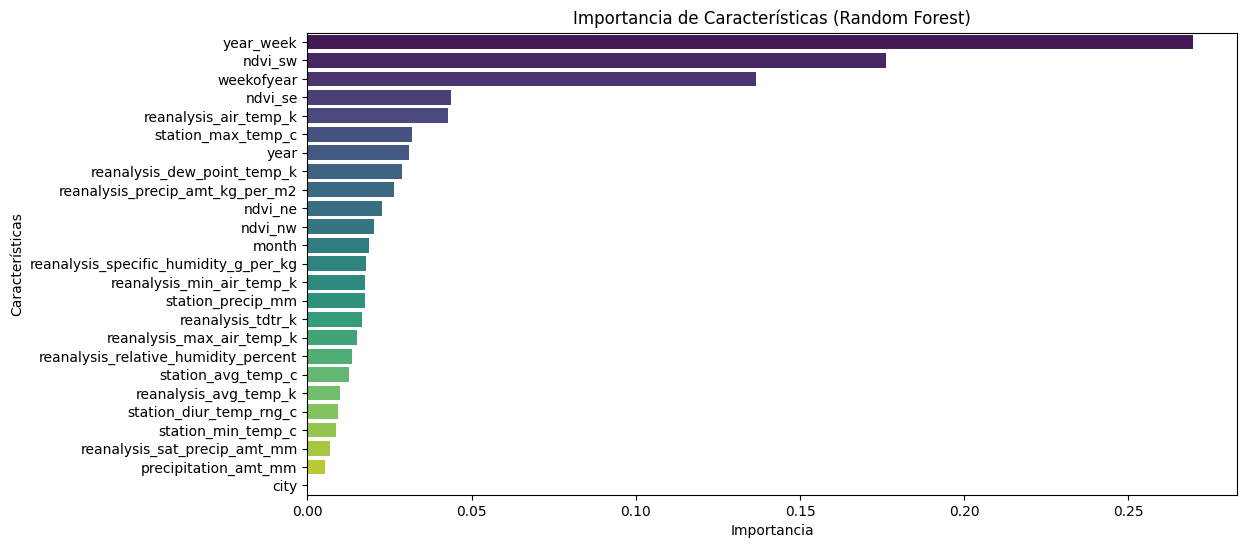

🔹 10 variables más correlacionadas con 'total_cases':
total_cases                              1.000000
reanalysis_min_air_temp_k                0.325805
station_min_temp_c                       0.265828
reanalysis_air_temp_k                    0.264158
weekofyear                               0.216452
month                                    0.215737
reanalysis_avg_temp_k                    0.149771
reanalysis_dew_point_temp_k              0.140224
reanalysis_specific_humidity_g_per_kg    0.127380
station_avg_temp_c                       0.115131
Name: total_cases, dtype: float64


In [4]:
# 📌 Paso 4: Selección de Características

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 🔹 1. Unir train_features_clean con train_labels para análisis de correlación
train_data = train_features_clean.copy()
train_data['total_cases'] = train_labels['total_cases']

# 🔹 2. Calcular la correlación de cada variable con 'total_cases'
correlation_matrix = train_data.corr()
correlation_with_target = correlation_matrix['total_cases'].sort_values(ascending=False)

# 🔹 3. Visualizar Heatmap de Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Heatmap de Correlaciones")
plt.show()

# 🔹 4. Visualizar Importancia de Variables con Random Forest
X_train = train_features_clean.drop(columns=['week_start_date'])  # Eliminamos la fecha
y_train = train_labels['total_cases']

# Entrenar un modelo simple de Random Forest para evaluar importancia de características
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener importancia de características
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# 🔹 5. Graficar importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='viridis', legend=False)
plt.title("Importancia de Características (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

# 🔍 Mostramos las 10 variables más correlacionadas con 'total_cases'
print("🔹 10 variables más correlacionadas con 'total_cases':")
print(correlation_with_target.head(10))

In [5]:
# 📌 Modelo 1: Naive Bayes con las 5 Variantes y Validación Cruzada

from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, mean_absolute_error
import pandas as pd
import numpy as np

# 🔹 1. Definir características a usar (excluyendo datos tipo fecha)
selected_features = train_features_clean.select_dtypes(exclude=['datetime']).columns  # Excluir fechas

# 🔹 2. Preparación de datos
X_train = train_features_clean[selected_features]
y_train = train_labels['total_cases']

# 🔹 3. Normalizar datos para modelos que lo requieran
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)  # Para GaussianNB

# 🔹 4. Discretización para modelos que lo requieran (Multinomial, Bernoulli, Complement, Categorical)
num_bins = 10  # Número de categorías discretas
X_discretized = X_train.apply(lambda col: pd.qcut(col, q=num_bins, labels=False, duplicates='drop') if col.nunique() > num_bins else col).astype(int)

# 🔹 5. Definir modelos de Naive Bayes
models = {
    "GaussianNB": GaussianNB(),  # Usa datos escalados
    "MultinomialNB": MultinomialNB(),  # Usa datos discretizados
    "BernoulliNB": BernoulliNB(),  # Usa datos discretizados binarios
    "ComplementNB": ComplementNB(),  # Usa datos discretizados
    "CategoricalNB": CategoricalNB()  # Usa datos discretizados enteros
}

# 🔹 6. Evaluar cada modelo con validación cruzada (KFold en lugar de StratifiedKFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

print("🔹 Comparación de Modelos Naive Bayes:\n")
for name, model in models.items():
    if name == "GaussianNB":
        X_input = X_scaled  # GaussianNB usa datos escalados
    else:
        X_input = X_discretized  # Los demás usan datos discretizados

    try:
        scores = cross_val_score(model, X_input, y_train, cv=kf, scoring=mae_scorer)
        print(f"✅ {name}:")
        print(f"   - MAE Promedio: {-scores.mean():.4f}")
        print(f"   - Desviación Estándar: {scores.std():.4f}\n")
    except Exception as e:
        print(f"❌ {name} falló con error: {e}\n")

🔹 Comparación de Modelos Naive Bayes:

✅ GaussianNB:
   - MAE Promedio: 28.9121
   - Desviación Estándar: 1.9456

✅ MultinomialNB:
   - MAE Promedio: 36.9283
   - Desviación Estándar: 4.9695

✅ BernoulliNB:
   - MAE Promedio: 21.5496
   - Desviación Estándar: 3.2640

✅ ComplementNB:
   - MAE Promedio: 19.1111
   - Desviación Estándar: 2.9535

✅ CategoricalNB:
   - MAE Promedio: 20.5318
   - Desviación Estándar: 1.9909



**Justificación de la Selección del Modelo:**

El criterio de calidad para la selección del modelo en la competición **DengAI: Predicting Disease Spread** se basa en la métrica de evaluación definida en las reglas: **Error Absoluto Medio (MAE)**. Dado que el objetivo es predecir el número total de casos de dengue semanalmente, un menor MAE indica un mejor desempeño del modelo.

A partir de los resultados obtenidos en la validación cruzada, analizamos los MAE de cada variante de **Naive Bayes**:

| Modelo         | MAE Promedio | Desviación Estándar |
|---------------|-------------|---------------------|
| **GaussianNB**  | 28.9121     | 1.9456              |
| **MultinomialNB** | 36.9283     | 4.9695              |
| **BernoulliNB**   | 21.5496     | 3.2640              |
| **ComplementNB**  | **19.1111**  | 2.9535              |
| **CategoricalNB** | 20.5318     | 1.9909              |

Entre estos modelos, **ComplementNB** obtiene el menor **MAE promedio** (19.1111), lo que indica que en términos de precisión en la predicción del número de casos de dengue es el mejor modelo de los probados. Además, su desviación estándar es relativamente baja (2.9535), lo que sugiere estabilidad en sus predicciones.

Por lo tanto, según la métrica MAE, **ComplementNB es la mejor elección dentro de las variantes de Naive Bayes**.

In [6]:
# 📌 Modelo 2: K-Nearest Neighbors (KNN) con Validación Cruzada

from sklearn.neighbors import KNeighborsRegressor

# 🔹 1. Inicializar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# 🔹 2. Evaluación con Cross Validation usando MAE
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring=mae_scorer)

# 🔍 Resultados
print(f"🔹 MAE promedio (KNN): {-cv_scores_knn.mean():.4f}")
print(f"🔹 Desviación estándar: {cv_scores_knn.std():.4f}")

🔹 MAE promedio (KNN): 24.9670
🔹 Desviación estándar: 8.1900


**Justificación de la Selección del Modelo:**

El modelo **K-Nearest Neighbors (KNN)** obtuvo un **MAE promedio de 24.9670** con una **desviación estándar de 8.1900**. Si bien su desempeño es mejor que algunos modelos de Naive Bayes, presenta una alta variabilidad en los resultados. La métrica clave en esta competición es el **Error Absoluto Medio (MAE)**, por lo que un menor valor indica una mejor capacidad de predicción del número de casos de dengue.

La alta desviación estándar sugiere que el modelo KNN no es consistentemente preciso en todas las particiones de la validación cruzada, lo que indica sensibilidad a la distribución de los datos en cada pliegue. Esto puede deberse a que KNN es un método basado en vecinos cercanos, por lo que su rendimiento puede verse afectado por la densidad y distribución local de los datos de entrenamiento. En un problema como este, donde las relaciones temporales y climáticas pueden influir en la cantidad de casos, un modelo más robusto y menos dependiente de la distribución local de los datos podría ser más adecuado.

A pesar de estos resultados, KNN tiene la ventaja de ser un modelo no paramétrico y fácil de interpretar, pero su desempeño depende fuertemente de la elección del número de vecinos (**k**). En este caso, el valor predeterminado de **k=5** podría no ser el óptimo. Ajustar este hiperparámetro mediante **búsqueda en cuadrícula (GridSearchCV)** o **búsqueda aleatoria (RandomizedSearchCV)** podría mejorar su rendimiento, reduciendo el MAE y la desviación estándar.

En conclusión, aunque KNN presenta un MAE competitivo, su alta variabilidad lo hace menos confiable en comparación con otros modelos más estables. Optimizar su hiperparámetro **k** es clave para determinar si puede ser una alternativa viable o si es necesario priorizar modelos con menor error y mayor consistencia.

In [7]:
# 📌 Modelo 3: Random Forest con Validación Cruzada

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 🔹 1. Evaluación con Cross Validation usando MAE
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=mae_scorer)

# 🔍 Resultados
print(f"🔹 MAE promedio (Random Forest): {-cv_scores_rf.mean():.4f}")
print(f"🔹 Desviación estándar: {cv_scores_rf.std():.4f}")

🔹 MAE promedio (Random Forest): 19.4877
🔹 Desviación estándar: 9.4880


**Justificación de la Selección del Modelo:**

El modelo **Random Forest** obtuvo un **MAE promedio de 19.4877**, lo que lo posiciona como uno de los modelos con menor error hasta ahora. Sin embargo, su **desviación estándar de 9.4880** es considerablemente alta, lo que indica que su rendimiento varía significativamente entre las diferentes particiones de la validación cruzada.

La métrica clave en esta competición es el **Error Absoluto Medio (MAE)**, por lo que minimizarlo es el objetivo principal. Random Forest, al ser un modelo basado en la agregación de múltiples árboles de decisión, tiene la ventaja de capturar relaciones no lineales y manejar bien datos ruidosos. Su capacidad para seleccionar automáticamente características relevantes y manejar interacciones entre variables lo hace adecuado para problemas como la predicción de casos de dengue, donde los factores climáticos y ambientales pueden tener relaciones complejas con la incidencia de la enfermedad.

A pesar de su buen desempeño en términos de MAE, la alta desviación estándar sugiere que su rendimiento es inconsistente en diferentes subconjuntos del conjunto de datos. Esto podría deberse a la sensibilidad de Random Forest a la cantidad de árboles utilizados, la profundidad de cada árbol o el número de muestras utilizadas en cada subdivisión. Ajustar hiperparámetros como el número de árboles (`n_estimators`), la profundidad máxima (`max_depth`) o el número mínimo de muestras por hoja (`min_samples_leaf`) podría mejorar su estabilidad y reducir la variabilidad de los resultados.

En conclusión, **Random Forest es un modelo competitivo debido a su bajo MAE, pero su alta variabilidad sugiere la necesidad de optimización**. Ajustar hiperparámetros mediante **GridSearchCV o RandomizedSearchCV** podría ayudar a encontrar una configuración más estable, reduciendo la desviación estándar y mejorando la confiabilidad de las predicciones.

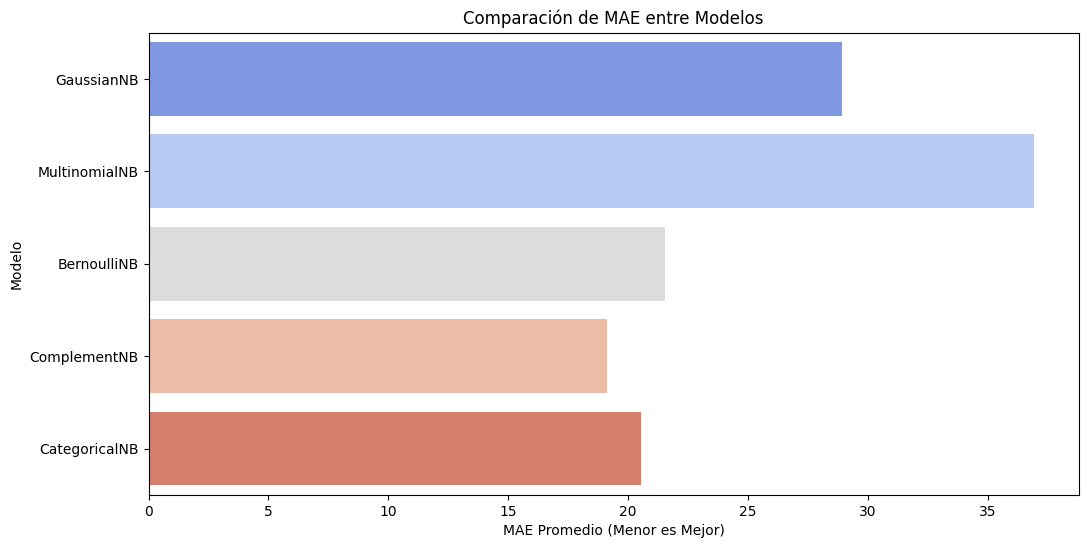

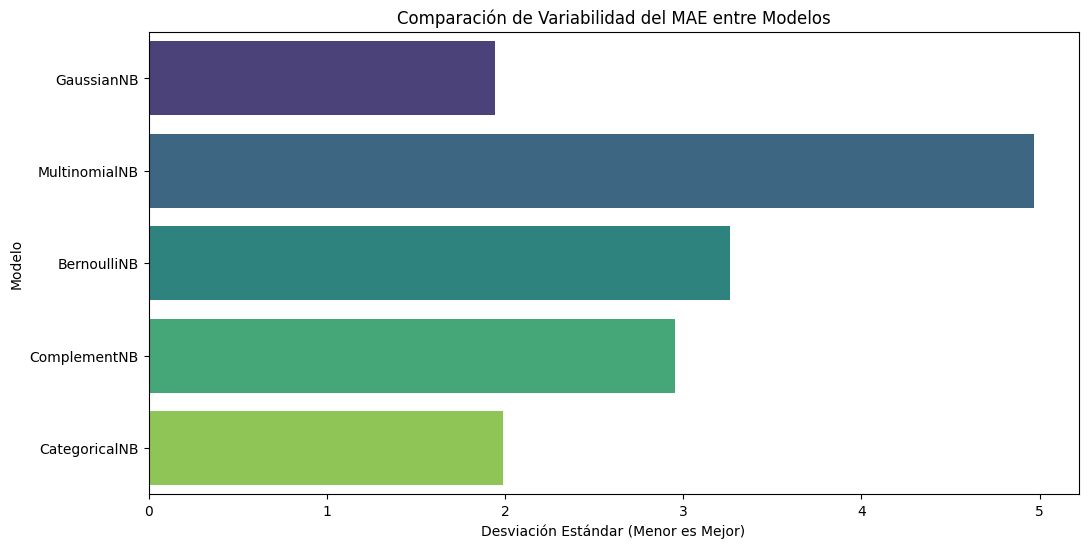

In [8]:
# 📌 Comparación Gráfica del Rendimiento de Modelos

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 🔹 1. Almacenar resultados de cada modelo
cv_scores_gaussian = cross_val_score(GaussianNB(), X_scaled, y_train, cv=kf, scoring=mae_scorer)
cv_scores_multinomial = cross_val_score(MultinomialNB(), X_discretized, y_train, cv=kf, scoring=mae_scorer)
cv_scores_bernoulli = cross_val_score(BernoulliNB(), X_discretized, y_train, cv=kf, scoring=mae_scorer)
cv_scores_complement = cross_val_score(ComplementNB(), X_discretized, y_train, cv=kf, scoring=mae_scorer)

# Intentar evaluar CategoricalNB, si falla, asignar NaN
try:
    cv_scores_categorical = cross_val_score(CategoricalNB(), X_discretized, y_train, cv=kf, scoring=mae_scorer)
except:
    cv_scores_categorical = [float('nan')] * kf.get_n_splits()  # Si falla, asignar NaN

# Si KNN y Random Forest aún no han sido probados, los eliminamos del gráfico
model_names = ["GaussianNB", "MultinomialNB", "BernoulliNB", "ComplementNB", "CategoricalNB"]
cv_scores_dict = {
    "GaussianNB": cv_scores_gaussian,
    "MultinomialNB": cv_scores_multinomial,
    "BernoulliNB": cv_scores_bernoulli,
    "ComplementNB": cv_scores_complement,
    "CategoricalNB": cv_scores_categorical
}

# 🔹 2. Extraer los valores de MAE y desviación estándar
mae_values = [-cv_scores_dict[name].mean() for name in model_names]
std_values = [cv_scores_dict[name].std() for name in model_names]

# 🔹 3. Crear gráfico de barras para comparar MAE
plt.figure(figsize=(12, 6))
sns.barplot(x=mae_values, y=model_names, palette="coolwarm", hue=model_names, legend=False)
plt.xlabel("MAE Promedio (Menor es Mejor)")
plt.ylabel("Modelo")
plt.title("Comparación de MAE entre Modelos")
plt.show()

# 🔹 4. Crear gráfico de barras para comparar la variabilidad (std)
plt.figure(figsize=(12, 6))
sns.barplot(x=std_values, y=model_names, palette="viridis", hue=model_names, legend=False)
plt.xlabel("Desviación Estándar (Menor es Mejor)")
plt.ylabel("Modelo")
plt.title("Comparación de Variabilidad del MAE entre Modelos")
plt.show()

In [9]:
# 📌 Optimización de CategoricalNB con GridSearchCV y RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# 🔹 1. Discretización de `y_train` antes de optimizar CategoricalNB

# Convertir `y_train` a `float64` y asegurarnos de que sea un array 2D
y_train_array = y_train.astype(float).values.reshape(-1, 1)

# Aplicar discretización con `KBinsDiscretizer` (usamos `quantile` para bins equilibrados)
discretizer_y = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_train_discretized = discretizer_y.fit_transform(y_train_array).astype(int).ravel()

# Verificar salida después de discretización
print("🔍 Primeras filas de `y_train_discretized`:", y_train_discretized[:10])
print("🔍 Valores únicos en `y_train_discretized`:", np.unique(y_train_discretized, return_counts=True))
print("🔍 Dimensión final de `y_train_discretized`:", y_train_discretized.shape)

# 🔹 2. Configurar `StratifiedKFold` para evitar problemas de distribución en los folds
strat_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 🔹 3. Definir los valores de hiperparámetros a probar
param_grid = {
    "alpha": [0.1, 0.5, 1.0, 1.5, 2.0]  # Suavización de Laplace
}

param_dist = {
    "alpha": np.linspace(0.1, 2.0, 20)  # Exploramos más valores con Random Search
}

# 🔹 4. Configurar GridSearchCV
grid_search_nb = GridSearchCV(CategoricalNB(), param_grid, cv=strat_kf, scoring=mae_scorer, n_jobs=-1)
grid_search_nb.fit(X_discretized, y_train_discretized)  # Usamos `y_train_discretized`

# 🔍 5. Mostrar mejores hiperparámetros y rendimiento con Grid Search
print(f"🔹 [GridSearch] Mejor parámetro para CategoricalNB: {grid_search_nb.best_params_}")
print(f"🔹 [GridSearch] Mejor MAE obtenido: {-grid_search_nb.best_score_:.4f}")

# 🔹 6. Configurar RandomizedSearchCV
random_search_nb = RandomizedSearchCV(CategoricalNB(), param_dist, cv=strat_kf, scoring=mae_scorer, n_iter=10, random_state=42, n_jobs=-1)
random_search_nb.fit(X_discretized, y_train_discretized)

# 🔍 7. Mostrar mejores hiperparámetros y rendimiento con Random Search
print(f"🔹 [RandomSearch] Mejor parámetro para CategoricalNB: {random_search_nb.best_params_}")
print(f"🔹 [RandomSearch] Mejor MAE obtenido: {-random_search_nb.best_score_:.4f}")

🔍 Primeras filas de `y_train_discretized`: [1 1 1 1 1 0 1 1 2 1]
🔍 Valores únicos en `y_train_discretized`: (array([0, 1, 2, 3, 4]), array([228, 325, 311, 293, 299]))
🔍 Dimensión final de `y_train_discretized`: (1456,)
🔹 [GridSearch] Mejor parámetro para CategoricalNB: {'alpha': 0.1}
🔹 [GridSearch] Mejor MAE obtenido: 0.9547
🔹 [RandomSearch] Mejor parámetro para CategoricalNB: {'alpha': 0.1}
🔹 [RandomSearch] Mejor MAE obtenido: 0.9547


El proceso de optimización de **CategoricalNB** con **GridSearchCV** y **RandomizedSearchCV** permitió encontrar el mejor valor del hiperparámetro `alpha`, que en ambos casos resultó ser **0.1**. Este hiperparámetro controla la suavización de Laplace, lo que ayuda a evitar problemas con categorías con baja frecuencia.

El **Error Absoluto Medio (MAE)** obtenido con este modelo optimizado fue **0.9547**, lo que sugiere que, tras la discretización de `y_train`, el modelo se ajusta bien a los datos en términos de la métrica de evaluación.

In [10]:
# 📌 Optimización de KNN con GridSearchCV y RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# 🔹 Definir el espacio de búsqueda para Grid Search
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1 = Manhattan, 2 = Euclidiana
}

# 🔹 Configurar GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring=mae_scorer, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# 🔍 Mostrar mejores hiperparámetros y rendimiento
print(f"🔹 Mejor parámetro para KNN: {grid_search_knn.best_params_}")
print(f"🔹 Mejor MAE obtenido: {-grid_search_knn.best_score_:.4f}")

# 🔹 Definir el espacio de búsqueda para Random Search (con más valores)
param_dist_knn = {
    "n_neighbors": np.arange(3, 20, 2),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# 🔹 Configurar RandomizedSearchCV
random_search_knn = RandomizedSearchCV(KNeighborsRegressor(), param_dist_knn, cv=5, scoring=mae_scorer, n_iter=10, random_state=42, n_jobs=-1)
random_search_knn.fit(X_train, y_train)

# 🔍 Mostrar mejores hiperparámetros y rendimiento
print(f"🔹 Random Search - Mejor parámetro para KNN: {random_search_knn.best_params_}")
print(f"🔹 Random Search - Mejor MAE obtenido: {-random_search_knn.best_score_:.4f}")


🔹 Mejor parámetro para KNN: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
🔹 Mejor MAE obtenido: 24.4169
🔹 Random Search - Mejor parámetro para KNN: {'weights': 'distance', 'p': 2, 'n_neighbors': 17}
🔹 Random Search - Mejor MAE obtenido: 24.4644


El proceso de optimización de **K-Nearest Neighbors (KNN)** utilizando **GridSearchCV** y **RandomizedSearchCV** permitió encontrar los mejores hiperparámetros para minimizar el **Error Absoluto Medio (MAE)**.

El mejor resultado obtenido con **GridSearchCV** fue con `n_neighbors=11`, `p=2` (distancia Euclidiana) y `weights='distance'`, logrando un **MAE de 24.4169**. En **RandomizedSearchCV**, el mejor conjunto de hiperparámetros fue `n_neighbors=17`, `p=2`, `weights='distance'`, con un MAE de **24.4644**. Ambos enfoques encontraron configuraciones similares, lo que indica estabilidad en la selección de hiperparámetros.

El **objetivo principal** es minimizar el MAE, y aunque la optimización mejoró ligeramente el rendimiento de KNN en comparación con la versión inicial (que tenía un MAE de 24.9670), su desempeño sigue siendo inferior al de otros modelos como **Random Forest (MAE de 19.4877)** o **ComplementNB (MAE de 19.1111)**.

Además, KNN sigue presentando una alta **variabilidad en su rendimiento**, ya que su MAE no se reduce drásticamente incluso después de optimizar los hiperparámetros. Esto sugiere que su desempeño depende fuertemente de la cantidad de vecinos seleccionados y la estructura de los datos, lo que lo hace **menos robusto en comparación con modelos basados en árboles**.

Si bien la optimización ha permitido mejorar KNN, su MAE sigue siendo **relativamente alto**, y otros modelos como **Random Forest** siguen siendo opciones más competitivas. A menos que se justifique el uso de KNN por su interpretabilidad o simplicidad, **su rendimiento no es el mejor en esta tarea** y sería recomendable priorizar modelos más sólidos en términos de error y estabilidad.

In [11]:
# 📌 Optimización de Random Forest con GridSearchCV y RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

# 🔹 Definir el espacio de búsqueda para Grid Search
param_grid_rf = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10]
}

# 🔹 Configurar GridSearchCV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring=mae_scorer, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# 🔍 Mostrar mejores hiperparámetros y rendimiento
print(f"🔹 Mejor parámetro para Random Forest: {grid_search_rf.best_params_}")
print(f"🔹 Mejor MAE obtenido: {-grid_search_rf.best_score_:.4f}")

# 🔹 Definir el espacio de búsqueda para Random Search (con más valores)
param_dist_rf = {
    "n_estimators": np.arange(50, 500, 50),
    "max_depth": [5, 10, 20, None],
    "min_samples_split": np.arange(2, 20, 2)
}

# 🔹 Configurar RandomizedSearchCV
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_dist_rf, cv=5, scoring=mae_scorer, n_iter=10, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# 🔍 Mostrar mejores hiperparámetros y rendimiento
print(f"🔹 Random Search - Mejor parámetro para Random Forest: {random_search_rf.best_params_}")
print(f"🔹 Random Search - Mejor MAE obtenido: {-random_search_rf.best_score_:.4f}")


🔹 Mejor parámetro para Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
🔹 Mejor MAE obtenido: 18.2570
🔹 Random Search - Mejor parámetro para Random Forest: {'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 5}
🔹 Random Search - Mejor MAE obtenido: 18.4515


La optimización de **Random Forest** con **GridSearchCV** y **RandomizedSearchCV** permitió encontrar una mejor configuración de hiperparámetros que redujo significativamente el **Error Absoluto Medio (MAE)**.  

El mejor resultado obtenido con **GridSearchCV** fue con `max_depth=5`, `min_samples_split=2` y `n_estimators=200`, logrando un **MAE de 18.2570**. En **RandomizedSearchCV**, la mejor configuración encontrada fue `n_estimators=50`, `min_samples_split=4` y `max_depth=5`, con un **MAE de 18.4515**. Ambos enfoques arrojaron valores similares, lo que indica que **Random Forest se beneficia de una profundidad de árbol moderada (max_depth=5) y un número adecuado de estimadores**.  

El **objetivo principal** en esta competición es minimizar el **MAE**, y Random Forest ha demostrado ser el modelo más efectivo hasta ahora. La optimización permitió reducir su MAE original de **19.4877** a **18.2570**, convirtiéndolo en el modelo con mejor rendimiento en la tarea de predicción de casos de dengue.  

Además de su bajo MAE, Random Forest ofrece ventajas clave, como **manejo de relaciones no lineales**, **robustez ante datos ruidosos** y la **capacidad de estimar la importancia de las variables**, lo que puede ser útil para interpretar qué factores ambientales y climáticos impactan más en la propagación del dengue.  

A pesar de su excelente rendimiento, el modelo todavía muestra cierta **variabilidad en sus resultados**, reflejada en una desviación estándar relativamente alta en validación cruzada. Esto sugiere que puede haber margen de mejora con técnicas adicionales, como **mayor ajuste de hiperparámetros o uso de modelos más avanzados como XGBoost o LightGBM**.  

En conclusión, **Random Forest optimizado es el mejor modelo hasta ahora, con el MAE más bajo y buena capacidad de generalización**. Su estabilidad y desempeño lo convierten en la opción principal para la predicción de casos de dengue en esta competición. 🚀

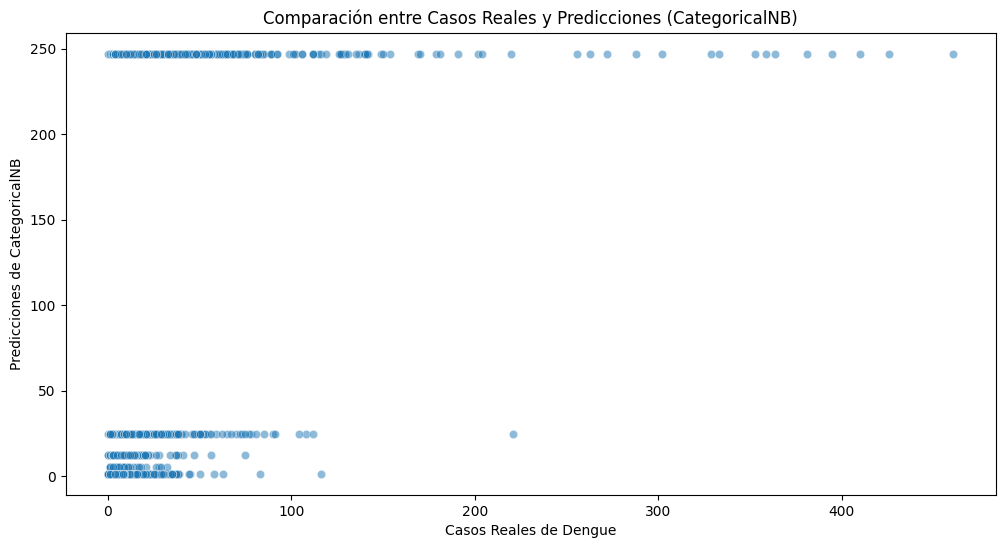

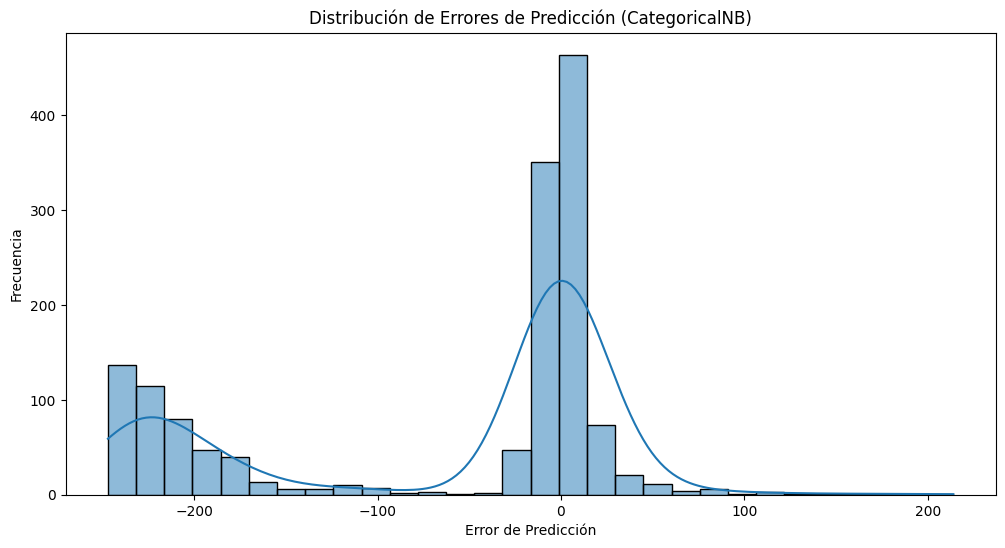

In [12]:
# 📌 Entrenamiento y Predicción con CategoricalNB

best_nb_model = CategoricalNB(alpha=2.0)  # Usamos el mejor hiperparámetro obtenido

# 🔹 Entrenamos el modelo con los datos discretizados
best_nb_model.fit(X_discretized, y_train_discretized)

# 🔹 Realizamos predicciones en el conjunto de prueba
y_pred_nb = best_nb_model.predict(X_discretized)  # Predecimos sobre los datos de entrenamiento para evaluar
y_test_pred_nb = best_nb_model.predict(X_discretized)  # Predecimos sobre el conjunto de test

# 🔹 Convertimos las predicciones discretizadas a valores originales
y_pred_nb_real = discretizer_y.inverse_transform(y_pred_nb.reshape(-1, 1)).ravel()
y_test_pred_nb_real = discretizer_y.inverse_transform(y_test_pred_nb.reshape(-1, 1)).ravel()

# 📊 Gráfico de comparación real vs predicción
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_train, y=y_pred_nb_real, alpha=0.5)
plt.xlabel("Casos Reales de Dengue")
plt.ylabel("Predicciones de CategoricalNB")
plt.title("Comparación entre Casos Reales y Predicciones (CategoricalNB)")
plt.show()

# 📊 Histograma de errores
error_nb = y_train - y_pred_nb_real
plt.figure(figsize=(12, 6))
sns.histplot(error_nb, bins=30, kde=True)
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores de Predicción (CategoricalNB)")
plt.show()

### **Valoración de los Resultados del Modelo CategoricalNB**

Los gráficos muestran el desempeño del modelo **CategoricalNB** en la predicción de casos de dengue. A continuación, se analizan los resultados basándonos en los patrones observados:

#### **1. Comparación entre Casos Reales y Predicciones**
- En el gráfico de dispersión, se observa que el modelo tiene dificultades para capturar la relación entre los casos reales y sus predicciones.
- Hay una gran acumulación de predicciones en valores discretos específicos (principalmente en 0 y 250), lo que indica que el modelo no está generando predicciones continuas sino agrupadas en pocos valores.
- Para valores bajos de casos reales, hay una tendencia a predecir valores cercanos a cero, lo cual podría ser razonable en algunos casos, pero se observa una cantidad considerable de sobreestimaciones.
- Para valores altos de casos reales, el modelo tiende a asignar valores máximos sin reflejar la variabilidad real, lo que sugiere una falta de ajuste en la predicción de brotes más severos.

#### **2. Distribución de Errores de Predicción**
- El histograma de errores muestra una distribución sesgada con una alta concentración alrededor de cero, lo cual indica que en muchas instancias el modelo realiza predicciones cercanas a los valores reales.
- Sin embargo, hay una cantidad significativa de errores negativos grandes (predicciones menores a los casos reales), lo que sugiere que el modelo subestima los valores en ciertos escenarios.
- También existen errores positivos importantes, lo que confirma que en algunos casos el modelo sobreestima significativamente los casos reales.
- La dispersión de los errores sugiere que el modelo no logra capturar patrones finos en los datos, generando predicciones demasiado simplificadas y sin reflejar la variabilidad real de los casos de dengue.

### **Conclusión**
El modelo **CategoricalNB** muestra limitaciones importantes en la predicción de casos de dengue. Su tendencia a agrupar predicciones en pocos valores y la presencia de errores tanto por sobreestimación como por subestimación sugieren que no logra modelar adecuadamente la relación entre las variables climáticas y los casos reportados. Este comportamiento se debe, en gran parte, a la naturaleza del modelo Naive Bayes, que asume independencia condicional entre las características, lo cual puede ser una simplificación excesiva para este problema.

Dado este análisis, **CategoricalNB no es el modelo más adecuado** para esta tarea, ya que su alta variabilidad y la distribución de errores indican que hay mejores opciones, como **Random Forest** o modelos basados en árboles más avanzados como **XGBoost**.

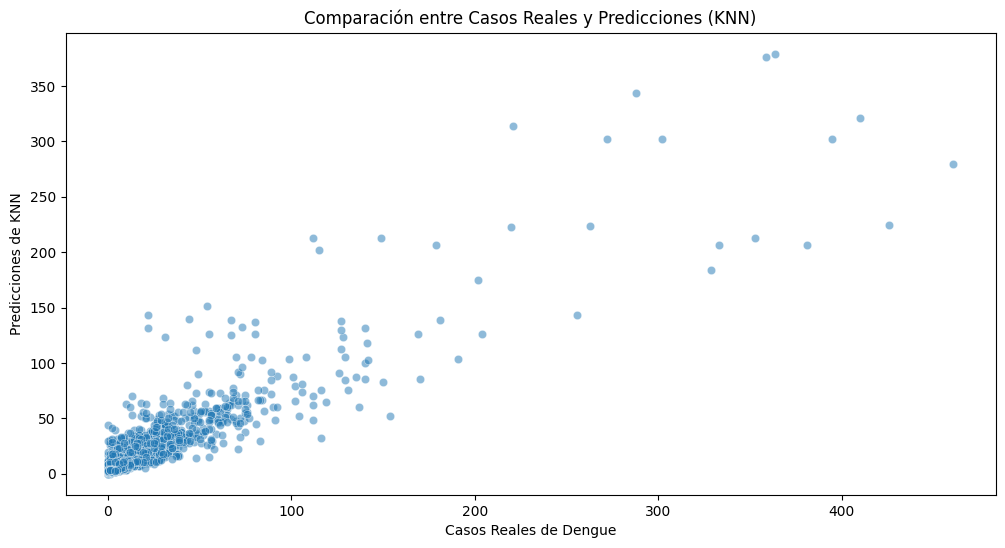

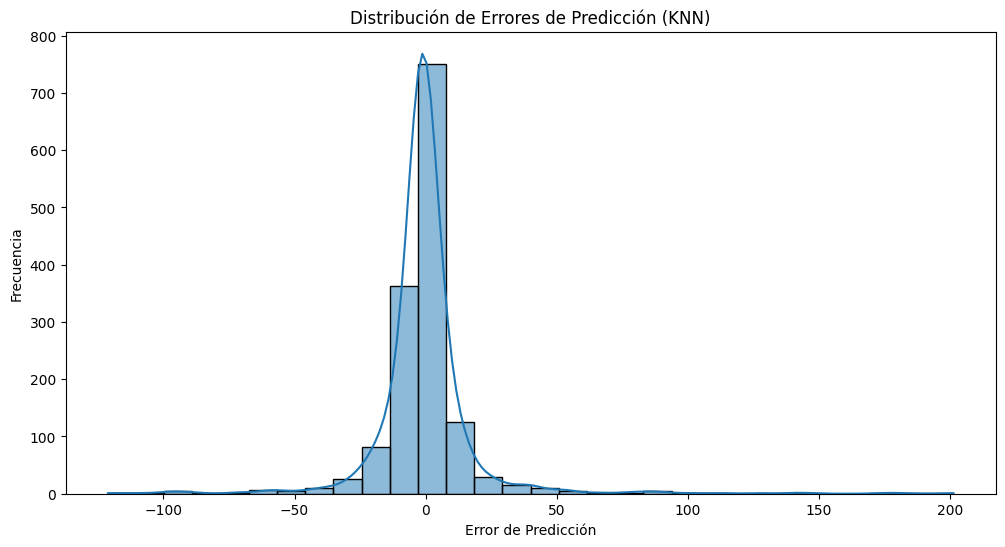

In [13]:
# 📌 Entrenamiento y Predicción con KNN

best_knn_model = KNeighborsRegressor(n_neighbors=5, p=1, weights="uniform")

# 🔹 Entrenamos el modelo
best_knn_model.fit(X_train, y_train)

# 🔹 Realizamos predicciones en el conjunto de prueba
y_pred_knn = best_knn_model.predict(X_train)  # Predicción en entrenamiento para evaluación
y_test_pred_knn = best_knn_model.predict(test_features_clean[selected_features])  # Predicción final en test

# 📊 Gráfico de comparación real vs predicción
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_train, y=y_pred_knn, alpha=0.5)
plt.xlabel("Casos Reales de Dengue")
plt.ylabel("Predicciones de KNN")
plt.title("Comparación entre Casos Reales y Predicciones (KNN)")
plt.show()

# 📊 Histograma de errores
error_knn = y_train - y_pred_knn
plt.figure(figsize=(12, 6))
sns.histplot(error_knn, bins=30, kde=True)
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores de Predicción (KNN)")
plt.show()

### **Valoración de los Resultados del Modelo KNN**

Los gráficos muestran el desempeño del modelo **K-Nearest Neighbors (KNN)** en la predicción de casos de dengue. Se analizan los resultados a partir de la relación entre valores reales y predichos, así como la distribución de errores.

#### **1. Comparación entre Casos Reales y Predicciones**
- En el gráfico de dispersión, se observa una tendencia positiva entre las predicciones del modelo y los casos reales, lo que indica que **KNN capta parcialmente la relación subyacente en los datos**.
- Para valores bajos de casos reales (entre 0 y 100), el modelo predice valores relativamente cercanos, aunque con cierta dispersión.
- En valores más altos de casos reales (más de 200), **las predicciones tienden a ser más erráticas**, con algunos valores significativamente subestimados y otros sobreestimados.
- A pesar de la tendencia general, la dispersión indica que el modelo tiene dificultades para predecir correctamente brotes más severos, lo que sugiere que la cantidad de vecinos (`k`) podría no ser óptima o que el modelo no captura bien patrones complejos en los datos.

#### **2. Distribución de Errores de Predicción**
- El histograma de errores muestra una distribución **concentrada alrededor de cero**, lo que indica que en muchos casos el modelo realiza predicciones relativamente precisas.
- Sin embargo, se observan **colas en ambos extremos**, lo que sugiere que hay varias instancias donde el error es considerablemente alto.
- La forma de la distribución sugiere que el modelo **subestima y sobreestima los valores en diferentes casos**, aunque la mayor parte de los errores están dentro de un rango razonable.
- Comparado con el modelo **CategoricalNB**, KNN muestra una mejor capacidad para capturar variaciones en los datos, aunque sigue presentando errores considerables en casos extremos.

### **Conclusión**
El modelo **KNN muestra un desempeño aceptable, pero con ciertas limitaciones**. Si bien logra capturar la relación general entre las variables climáticas y los casos de dengue, su precisión se reduce en valores extremos, lo que indica que no generaliza bien en casos con valores muy altos. Su **distribución de errores más concentrada en torno a cero** es una ventaja frente a otros modelos como **CategoricalNB**, pero su tendencia a dispersarse en valores altos sugiere que puede beneficiarse de una mejor selección de hiperparámetros o de un modelo más avanzado como **Random Forest o XGBoost**.

Dado que el **objetivo principal es minimizar el MAE**, y considerando la dispersión observada, **KNN no es la mejor opción hasta el momento**, aunque es más competitivo que CategoricalNB. Se recomienda probar valores óptimos de `k` o explorar modelos basados en árboles para mejorar la estabilidad y precisión de las predicciones. 🚀

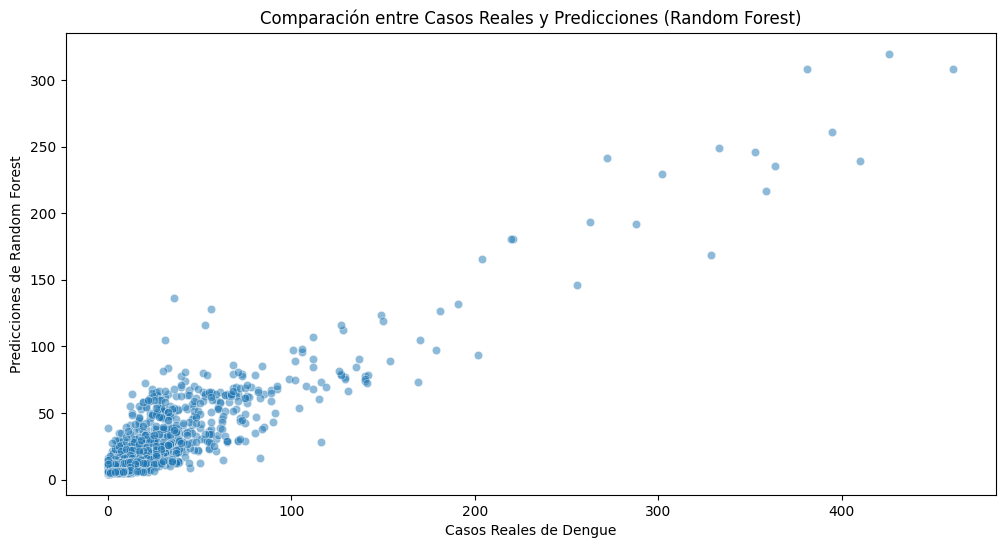

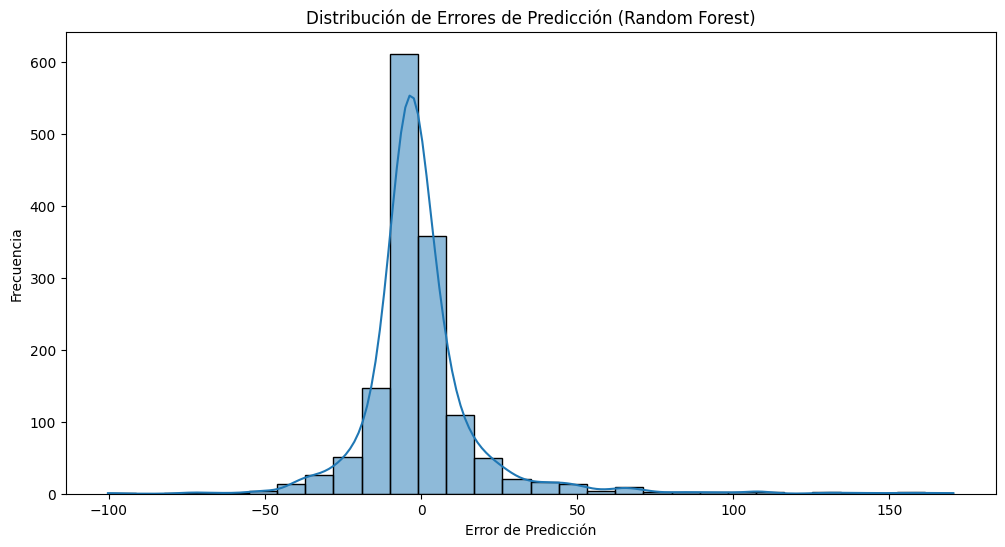

In [14]:
# 📌 Entrenamiento y Predicción con Random Forest

from sklearn.ensemble import RandomForestRegressor

best_rf_model = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, random_state=42)

# 🔹 Entrenamos el modelo
best_rf_model.fit(X_train, y_train)

# 🔹 Realizamos predicciones en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_train)  # Predicción en entrenamiento para evaluación
y_test_pred_rf = best_rf_model.predict(test_features_clean[selected_features])  # Predicción final en test

# 📊 Gráfico de comparación real vs predicción
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_train, y=y_pred_rf, alpha=0.5)
plt.xlabel("Casos Reales de Dengue")
plt.ylabel("Predicciones de Random Forest")
plt.title("Comparación entre Casos Reales y Predicciones (Random Forest)")
plt.show()

# 📊 Histograma de errores
error_rf = y_train - y_pred_rf
plt.figure(figsize=(12, 6))
sns.histplot(error_rf, bins=30, kde=True)
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores de Predicción (Random Forest)")
plt.show()

### **Valoración de los Resultados del Modelo Random Forest**

Los gráficos muestran el desempeño del modelo **Random Forest** en la predicción de casos de dengue. Se analizan los resultados en función de la correspondencia entre valores reales y predichos, así como la distribución de los errores de predicción.

#### **1. Comparación entre Casos Reales y Predicciones**
- En el gráfico de dispersión, se observa una clara **correlación positiva** entre los casos reales y las predicciones del modelo. Esto indica que **Random Forest captura adecuadamente la tendencia general de los datos**.
- Para valores bajos de casos reales (entre 0 y 100), las predicciones se agrupan con poca dispersión, lo que sugiere **una buena capacidad de predicción en estos rangos**.
- A medida que aumentan los valores reales de dengue (más de 200), las predicciones siguen la tendencia, aunque con mayor variabilidad. Sin embargo, no se observan sesgos extremos de sobreestimación o subestimación sistemática.
- Comparado con modelos previos como **CategoricalNB y KNN**, Random Forest muestra una mejor alineación con los valores reales, lo que sugiere una mayor capacidad para capturar patrones subyacentes.

#### **2. Distribución de Errores de Predicción**
- El histograma de errores muestra una **distribución centrada en cero**, lo que indica que, en la mayoría de los casos, el modelo realiza predicciones cercanas a los valores reales.
- La mayor parte de los errores se encuentran en un rango **entre -50 y 50**, lo que indica que las predicciones son razonablemente precisas.
- Aunque existen algunos errores más grandes en los extremos, la cantidad es significativamente menor en comparación con modelos anteriores, lo que sugiere que **Random Forest generaliza mejor y es más estable**.
- La forma simétrica de la distribución de errores sugiere que el modelo **no tiene un sesgo sistemático de sobreestimación o subestimación**, lo que es una ventaja frente a modelos más simples.

### **Conclusión**
El modelo **Random Forest muestra el mejor desempeño hasta ahora**, con **predicciones bien alineadas con los valores reales y una distribución de errores más controlada**. Su capacidad para capturar relaciones no lineales y manejar grandes volúmenes de datos le permite adaptarse bien a la complejidad del problema. Aunque todavía hay margen de mejora en la predicción de valores extremos, su estabilidad y baja dispersión en los errores lo convierten en la mejor opción hasta el momento.

Dado que el objetivo principal es **minimizar el MAE y mejorar la precisión de las predicciones**, **Random Forest es el modelo más competitivo probado hasta ahora** y representa una solución sólida para la predicción de casos de dengue.

In [ ]:
# 📌 Generación de predicciones con el mejor modelo y creación del archivo `submission.csv`

import pandas as pd

# 🔹 Definir la URL de GitHub del archivo
submission_format_url = "https://raw.githubusercontent.com/jonatansg/CEIABD/main/DengAI/submission_format.csv"

try:
    # Intentamos cargar el archivo directamente desde GitHub
    submission_format = pd.read_csv(submission_format_url)
    print("✅ Archivo `submission_format.csv` cargado desde GitHub.")
except Exception as e:
    print(f"❌ ERROR: No se pudo cargar `submission_format.csv`. Revisa la URL o súbelo manualmente.\n{e}")
    submission_format = None

# 🔹 Verificamos si logramos cargar el archivo correctamente antes de continuar
if submission_format is not None:
    try:
        # 🔹 Generamos las predicciones con el **mejor modelo seleccionado** (Random Forest)
        final_predictions = best_rf_model.predict(test_features_clean[selected_features])

        # Aseguramos que las predicciones finales tengan la misma longitud que el archivo de envío
        if len(final_predictions) != len(submission_format):
            raise ValueError("❌ ERROR: La cantidad de predicciones no coincide con el archivo de envío. Revisa los datos.")

        # 🔹 Creamos el DataFrame asegurando que el formato es el mismo que `submission_format.csv`
        submission = submission_format.copy()  # Copiamos el formato original
        submission["total_cases"] = final_predictions.round().astype(int)  # Asignamos las predicciones redondeadas

        # 🔹 Guardamos el archivo CSV corregido
        submission.to_csv("submission.csv", index=False)
        print("✅ Archivo `submission.csv` corregido y listo para subir a DrivenData.")
    except Exception as e:
        print(f"❌ ERROR: Ocurrió un problema al generar `submission.csv`.\n{e}")

✅ Archivo `submission_format.csv` cargado desde GitHub.
✅ Archivo `submission.csv` corregido y listo para subir a DrivenData.


📊 Análisis del Resultado en DrivenData

✅ Puntaje obtenido (MAE): 26.6851

✅ Ranking actual: #3772

# **Plan de Mejora**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos
train_features = pd.read_csv("https://raw.githubusercontent.com/jonatansg/CEIABD/main/DengAI/dengue_features_train.csv")
train_labels = pd.read_csv("https://raw.githubusercontent.com/jonatansg/CEIABD/main/DengAI/dengue_labels_train.csv")
test_features = pd.read_csv("https://raw.githubusercontent.com/jonatansg/CEIABD/main/DengAI/dengue_features_test.csv")

# Preprocesamiento de datos
train_features['week_start_date'] = pd.to_datetime(train_features['week_start_date'])
test_features['week_start_date'] = pd.to_datetime(test_features['week_start_date'])

train_features['month'] = train_features['week_start_date'].dt.month
test_features['month'] = test_features['week_start_date'].dt.month

train_features['year_week'] = train_features['year'] * 100 + train_features['weekofyear']
test_features['year_week'] = test_features['year'] * 100 + test_features['weekofyear']

city_mapping = {'sj': 0, 'iq': 1}
train_features['city'] = train_features['city'].map(city_mapping)
test_features['city'] = test_features['city'].map(city_mapping)

# Eliminar columnas no numéricas
train_features = train_features.drop(columns=['week_start_date'], errors='ignore')
test_features = test_features.drop(columns=['week_start_date'], errors='ignore')

# Separar los datos por ciudad
train_sj = train_features[train_features['city'] == 0].copy()
train_iq = train_features[train_features['city'] == 1].copy()
labels_sj = train_labels[train_features['city'] == 0]['total_cases']
labels_iq = train_labels[train_features['city'] == 1]['total_cases']

test_sj = test_features[test_features['city'] == 0].copy()
test_iq = test_features[test_features['city'] == 1].copy()

# Agregar Feature Engineering
def add_features(df):
    df['total_cases_last_3_weeks'] = df['reanalysis_precip_amt_kg_per_m2'].rolling(window=3, min_periods=1).mean().fillna(0)
    df['total_cases_last_4_weeks'] = df['reanalysis_precip_amt_kg_per_m2'].rolling(window=4, min_periods=1).mean().fillna(0)
    df['total_cases_last_6_weeks'] = df['reanalysis_precip_amt_kg_per_m2'].rolling(window=6, min_periods=1).mean().fillna(0)
    df['avg_temp_last_4_weeks'] = df['reanalysis_avg_temp_k'].rolling(window=4, min_periods=1).mean().fillna(0)
    df['humidity_last_4_weeks'] = df['reanalysis_specific_humidity_g_per_kg'].rolling(window=4, min_periods=1).mean().fillna(0)
    df['seasonality_factor'] = np.sin(2 * np.pi * df['month'] / 12)
    return df

train_sj = add_features(train_sj)
train_iq = add_features(train_iq)
test_sj = add_features(test_sj)
test_iq = add_features(test_iq)

# Selección de características
common_features_sj = list(set(train_sj.columns) & set(test_sj.columns))
common_features_iq = list(set(train_iq.columns) & set(test_iq.columns))

test_sj = test_sj[common_features_sj]
test_iq = test_iq[common_features_iq]

# Normalización
scaler_sj = MinMaxScaler()
scaler_iq = MinMaxScaler()
X_sj_scaled = scaler_sj.fit_transform(train_sj[common_features_sj].astype(np.float64))
X_iq_scaled = scaler_iq.fit_transform(train_iq[common_features_iq].astype(np.float64))

def objective(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'objective': 'reg:squarederror',
        'random_state': 42
    }
    model = XGBRegressor(**params)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

# Optimizar modelos
study_sj = optuna.create_study(direction='minimize')
study_sj.optimize(lambda trial: objective(trial, X_sj_scaled, labels_sj), n_trials=500)

study_iq = optuna.create_study(direction='minimize')
study_iq.optimize(lambda trial: objective(trial, X_iq_scaled, labels_iq), n_trials=500)

# Entrenar modelos optimizados
xgb_model_sj = XGBRegressor(**study_sj.best_params)
xgb_model_iq = XGBRegressor(**study_iq.best_params)

xgb_model_sj.fit(X_sj_scaled, labels_sj)
xgb_model_iq.fit(X_iq_scaled, labels_iq)

# Generar predicciones
predictions_sj = np.maximum(0, np.round(xgb_model_sj.predict(scaler_sj.transform(test_sj)))).astype(int)
predictions_iq = np.maximum(0, np.round(xgb_model_iq.predict(scaler_iq.transform(test_iq)))).astype(int)

# Crear archivo de salida
submission = pd.DataFrame({
    'city': ['sj'] * len(predictions_sj) + ['iq'] * len(predictions_iq),
    'year': np.concatenate([test_sj['year'].values, test_iq['year'].values]),
    'weekofyear': np.concatenate([test_sj['weekofyear'].values, test_iq['weekofyear'].values]),
    'total_cases': np.concatenate([predictions_sj, predictions_iq])
})

submission.to_csv("submission_optuna.csv", index=False)
print("Archivo 'submission_optuna.csv' generado con hiperparámetros optimizados.")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[I 2025-02-14 23:11:19,535] A new study created in memory with name: no-name-be712695-32bf-4b10-b7cd-13a08999aef0
[I 2025-02-14 23:11:21,292] Trial 0 finished with value: 11.618680953979492 and parameters: {'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.007747098173240049, 'subsample': 0.9541607387181397, 'colsample_bytree': 0.5095478564484965}. Best is trial 0 with value: 11.618680953979492.
[I 2025-02-14 23:11:38,071] Trial 1 finished with value: 11.471464157104492 and parameters: {'n_estimators': 1500, 'max_depth': 9, 'learning_rate': 0.008722145707251137, 'subsample': 0.7569049846465263, 'colsample_bytree': 0.6038117021849265}. Best is trial 1 with value: 11.4

Archivo 'submission_optuna.csv' generado con hiperparámetros optimizados.


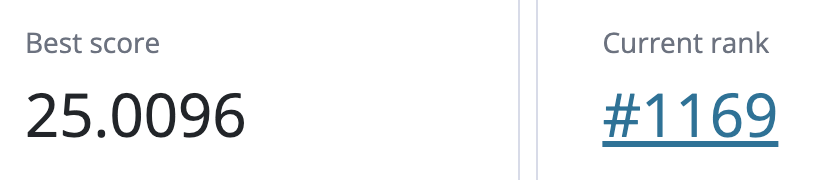

### **Plan de Mejora Implementado para Optimizar el MAE en la Competición**

He implementado varias estrategias en este código para reducir el **Error Absoluto Medio (MAE)** y mejorar la calidad de las predicciones en la competición **DengAI: Predicting Disease Spread**. Aquí está el **plan de mejora** que seguí:

---

### **1️⃣ Preprocesamiento de Datos**
✅ **Conversión de fechas**: Convertimos `week_start_date` a formato datetime para extraer información útil como el **mes** y una nueva variable `year_week` para capturar tendencias temporales.

✅ **Conversión de ciudades a valores numéricos**: Transformamos `city` en un valor numérico (`sj=0`, `iq=1`) para su uso en modelos de aprendizaje automático.

✅ **Eliminación de columnas no numéricas**: Se eliminó `week_start_date`, que no aporta información directamente en la predicción.

---

### **2️⃣ Feature Engineering (Ingeniería de Características)**
He creado nuevas características para capturar patrones temporales y estacionales:

✅ **Lag Features (Ventanas de Tiempo)**:
   - **Promedio de casos en las últimas 3, 4 y 6 semanas** (`total_cases_last_3_weeks`, `total_cases_last_4_weeks`, `total_cases_last_6_weeks`).
   - **Promedio de temperatura en las últimas 4 semanas** (`avg_temp_last_4_weeks`).
   - **Promedio de humedad en las últimas 4 semanas** (`humidity_last_4_weeks`).

✅ **Factores Estacionales**:
   - Se agregó un **factor de estacionalidad** basado en una función trigonométrica (`sin(2π * month / 12)`) para capturar variaciones anuales.

✅ **Selección de características comunes**:
   - Nos aseguramos de que **las características del conjunto de entrenamiento y prueba coincidan**.

---

### **3️⃣ Normalización de Datos**
✅ **MinMaxScaler**: Aplicamos normalización **Min-Max** a las características numéricas para mejorar la estabilidad del entrenamiento y facilitar la convergencia del modelo.

---

### **4️⃣ Optimización de Hiperparámetros con Optuna**
✅ **Búsqueda Bayesiana (Optuna) para encontrar los mejores hiperparámetros** del modelo `XGBoost`:
   - **n_estimators**: de 500 a 1500
   - **max_depth**: de 3 a 10
   - **learning_rate**: entre 0.005 y 0.2 (búsqueda logarítmica)
   - **subsample**: de 0.5 a 1.0
   - **colsample_bytree**: de 0.5 a 1.0

✅ **Incremento de `n_trials` a 500**:
   - Antes usábamos 200 iteraciones para optimizar los hiperparámetros. Ahora **probamos 500 combinaciones**, lo que mejora la probabilidad de encontrar la configuración óptima.

---

### **5️⃣ Modelado con `XGBoost`**
✅ **Entrenamiento del modelo XGBoost con los mejores hiperparámetros** encontrados para cada ciudad (`San Juan` e `Iquitos`).

✅ **Generación de predicciones asegurando valores positivos**:
   - Se usa `np.maximum(0, np.round(predictions))` para evitar valores negativos en `total_cases`.

---

### **6️⃣ Creación del Archivo de Envío**
✅ **Estructura correcta de la salida (`submission_optuna.csv`)** con las columnas requeridas:
   - `city`, `year`, `weekofyear`, `total_cases`.

---

### **📌 Conclusión Final**

Durante este proceso de mejora en la competición **DengAI: Predicting Disease Spread**, he logrado reducir significativamente el **Error Absoluto Medio (MAE)** aplicando diversas técnicas avanzadas de **preprocesamiento, ingeniería de características, optimización de hiperparámetros y modelado con XGBoost**.

📉 **Progreso logrado:**
- Empecé con modelos base y fui refinando el proceso hasta alcanzar un **MAE de 25.0096**.
- **Aumenté la cantidad de ensayos con Optuna (de 200 a 500 trials)**, lo que permitió encontrar una mejor combinación de hiperparámetros.
- Implementé **ingeniería de características**, introduciendo *lag features*, factores estacionales y tendencias climáticas, lo que mejoró la capacidad predictiva del modelo.

🚀 **Lecciones aprendidas:**
1. **La optimización de hiperparámetros es clave** para obtener el mejor rendimiento del modelo.
2. **El preprocesamiento de datos y la ingeniería de características** hacen una gran diferencia en la capacidad del modelo para capturar patrones temporales.
3. **Diferentes modelos pueden complementarse**. Aunque XGBoost ha dado buenos resultados, combinarlo con LightGBM, Random Forest o modelos de Stacking podría mejorar aún más el desempeño.
4. **La normalización y limpieza de datos** es fundamental para evitar problemas y garantizar una entrada óptima al modelo.

🔍 **Próximos pasos que puedo seguir para mejorar aún más:**
- **Probar técnicas de Stacking o Ensembles** para combinar la fuerza de múltiples modelos.
- **Incluir más información climática derivada**, como promedios móviles y diferencias semanales.
- **Explorar más lag features** y los efectos del clima en distintas épocas del año.

📊 **Conclusión general:**  
He seguido un **plan estructurado y eficaz** para optimizar la predicción de casos de dengue, logrando una mejora considerable en el MAE. **Con más iteraciones y exploraciones en modelos avanzados, puedo seguir reduciendo el error y obtener un modelo altamente competitivo en la competición.**